# CMS Open Payments EDA: Payment Analysis & Pattern Discovery

**Project:** AAI-540 Machine Learning Operations - Final Team Project  
**Dataset:** CMS Open Payments Program Year 2024 General Payments  
**Purpose:** Exploratory Data Analysis for Payment Patterns and Statistical Insights

---

## Table of Contents
1. [Environment Setup & Configuration](#setup)
2. [Data Loading & Overview](#loading)
3. [Data Quality Assessment](#quality)
4. [Univariate Analysis](#univariate)
5. [Bivariate & Multivariate Analysis](#multivariate)
6. [Temporal Analysis](#temporal)
7. [Geographic Analysis](#geographic)
8. [Feature Engineering](#features)
9. [Outlier Detection](#outliers)
10. [Advanced Visualizations](#advanced)
11. [Key Findings & Insights](#findings)

---


## 1. Environment Setup & Configuration {#setup}

Setting up the environment with necessary libraries and custom utilities.

In [1]:
# Install required packages
%pip install -r ../requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Package Installation

Install required packages from requirements.txt (run once)

In [2]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import json
from pathlib import Path
import sys
import os
from scipy import stats
import importlib

# Add parent directory to path to import custom modules
parent_dir = Path.cwd().parent
if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))

# Visualization settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")

# Import custom utilities
from config import CONFIG
from utils import CMSDataLoader, DataDictionaryHelper, PaymentVisualizer
from utils import AdvancedPaymentVisualizer, FeatureEngineer

# Reload modules to get latest changes
import utils.advanced_visualizations
importlib.reload(utils.advanced_visualizations)
from utils import AdvancedPaymentVisualizer

# Initialize data loader with correct path (notebook is in notebooks/ subdirectory)
loader = CMSDataLoader(data_dir="../data")

# Initialize visualizers
visualizer = PaymentVisualizer()
adv_visualizer = AdvancedPaymentVisualizer()

# Display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# Load light dataset for EDA
df = loader.load_dataset(CONFIG.data.light_dataset)

print(f"\nShape: {df.shape[0]:,} rows {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Loading dataset: lightdataset.csv
Loaded full dataset with 1,000,000 rows

Shape: 1,000,000 rows 91 columns
Memory Usage: 3505.02 MB


In [4]:
# Display first few rows
df.head(3).T

,0,1,2
Change_Type,ADD,ADD,ADD
Covered_Recipient_Type,Covered Recipient Teaching Hospital,Covered Recipient Teaching Hospital,Covered Recipient Teaching Hospital
Teaching_Hospital_CCN,190036.00,440039.00,520087.00
Teaching_Hospital_ID,14616.00,15311.00,15508.00
Teaching_Hospital_Name,Ochsner Clinic Foundation,Vanderbilt University Medical Center,Gundersen Lutheran Medical Center I
Covered_Recipient_Profile_ID,NaN,NaN,NaN
Covered_Recipient_NPI,NaN,NaN,NaN
Covered_Recipient_First_Name,NaN,NaN,NaN
Covered_Recipient_Middle_Name,NaN,NaN,NaN
Covered_Recipient_Last_Name,NaN,NaN,NaN


In [5]:
# Preprocess data
df = loader.preprocess_data(
    date_columns=CONFIG.data.date_columns,
    numeric_columns=CONFIG.data.numeric_columns
)

print(f"Dataset shape after preprocessing: {df.shape}")


Preprocessing data...
  Converted Date_of_Payment to datetime
  Converted Payment_Publication_Date to datetime
  Converted Total_Amount_of_Payment_USDollars to numeric
  Converted Number_of_Payments_Included_in_Total_Amount to numeric
  Converted Covered_Recipient_NPI to numeric
  Extracted temporal features
Dataset shape after preprocessing: (1000000, 95)


### Basic Statistics

In [6]:
# Get basic statistics
basic_stats = loader.get_basic_stats()

print(f"Total Rows: {basic_stats['n_rows']:,}")
print(f"Total Columns: {basic_stats['n_columns']}")
print(f"Memory Usage: {basic_stats['memory_usage_mb']:.2f} MB")
print(f"Missing Values: {basic_stats['missing_values']:,} ({basic_stats['missing_percentage']:.2f}%)")
print(f"Duplicate Rows: {basic_stats['duplicate_rows']:,}")

print(f"\nNumeric Columns: {len(basic_stats['numeric_columns'])}")
print(f"Categorical Columns: {len(basic_stats['categorical_columns'])}")
print(f"Datetime Columns: {len(basic_stats['datetime_columns'])}")

Total Rows: 1,000,000
Total Columns: 95
Memory Usage: 3407.74 MB
Missing Values: 51,827,634 (54.56%)
Duplicate Rows: 0

Numeric Columns: 23
Categorical Columns: 70
Datetime Columns: 2


## 3. Data Quality Assessment

Comprehensive assessment of data quality including completeness, validity, and consistency.

In [7]:
# Get data quality report
quality_report = loader.get_data_quality_report()

print("Completeness:")
print(f"  Total Cells: {quality_report['completeness']['total_cells']:,}")
print(f"  Missing Cells: {quality_report['completeness']['missing_cells']:,}")
print(f"  Completeness Rate: {quality_report['completeness']['completeness_rate']:.2f}%")

print("\nUniqueness:")
print(f"  Duplicate Rows: {quality_report['uniqueness']['duplicate_rows']:,}")
print(f"  Duplicate Percentage: {quality_report['uniqueness']['duplicate_percentage']:.2f}%")

print("\nValidity:")
for key, value in quality_report['validity'].items():
    print(f"  {key.replace('_', ' ').title()}: {value:,}")

Completeness:
  Total Cells: 95,000,000
  Missing Cells: 51,827,634
  Completeness Rate: 45.44%

Uniqueness:
  Duplicate Rows: 0
  Duplicate Percentage: 0.00%

Validity:
  Negative Payments: 0
  Zero Payments: 0
  Future Dates: 0


### Missing Values Analysis

In [8]:
# Get missing value summary
missing_summary = loader.get_missing_value_summary()
missing_summary.head(20)

,Column,Missing_Count,Missing_Percentage,Data_Type
0,Covered_Recipient_Primary_Type_4,1000000,100.00,float64
1,Covered_Recipient_Primary_Type_5,1000000,100.00,float64
2,Covered_Recipient_Specialty_2,1000000,100.00,float64
3,Covered_Recipient_Primary_Type_6,1000000,100.00,float64
4,Recipient_Postal_Code,999973,100.00,object
5,Recipient_Province,999975,100.00,object
6,Covered_Recipient_Specialty_6,1000000,100.00,float64
7,Covered_Recipient_Specialty_5,1000000,100.00,float64
8,Covered_Recipient_Specialty_4,1000000,100.00,float64
9,Covered_Recipient_Specialty_3,1000000,100.00,float64


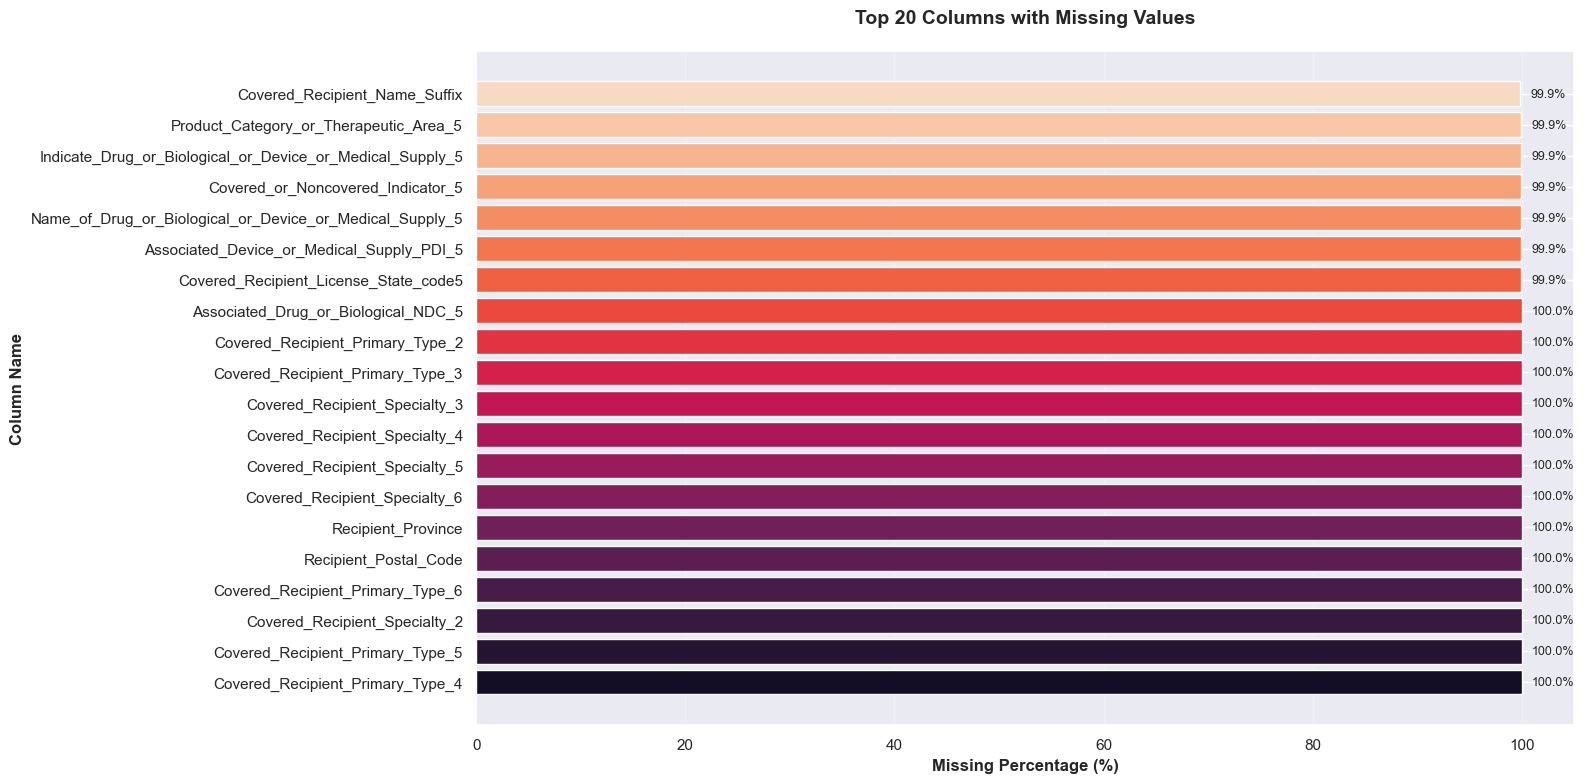

In [9]:
# Visualize missing values
fig = visualizer.plot_missing_values(df, top_n=20, figsize=CONFIG.viz.large_figsize)
plt.show()

## 4. Univariate Analysis

Analyzing individual variables to understand distributions, central tendencies, and variability.

### Payment Amount Distribution

In [10]:
# Payment amount statistics
payment_stats = df['Total_Amount_of_Payment_USDollars'].describe()

print("PAYMENT AMOUNT STATISTICS")
print(f"Count: {payment_stats['count']:,.0f}")
print(f"Mean: ${payment_stats['mean']:,.2f}")
print(f"Median: ${payment_stats['50%']:,.2f}")
print(f"Std Dev: ${payment_stats['std']:,.2f}")
print(f"Min: ${payment_stats['min']:,.2f}")
print(f"Max: ${payment_stats['max']:,.2f}")
print(f"\nQuartiles:")
print(f"  25th percentile: ${payment_stats['25%']:,.2f}")
print(f"  75th percentile: ${payment_stats['75%']:,.2f}")
print(f"\nAdditional Percentiles:")
for p in [90, 95, 99, 99.9]:
    val = df['Total_Amount_of_Payment_USDollars'].quantile(p/100)
    print(f"  {p}th percentile: ${val:,.2f}")

PAYMENT AMOUNT STATISTICS
Count: 1,000,000
Mean: $284.45
Median: $21.04
Std Dev: $8,139.22
Min: $0.01
Max: $3,082,225.00

Quartiles:
  25th percentile: $15.53
  75th percentile: $33.41

Additional Percentiles:
  90th percentile: $125.35
  95th percentile: $318.31
  99th percentile: $3,575.00
  99.9th percentile: $21,000.00


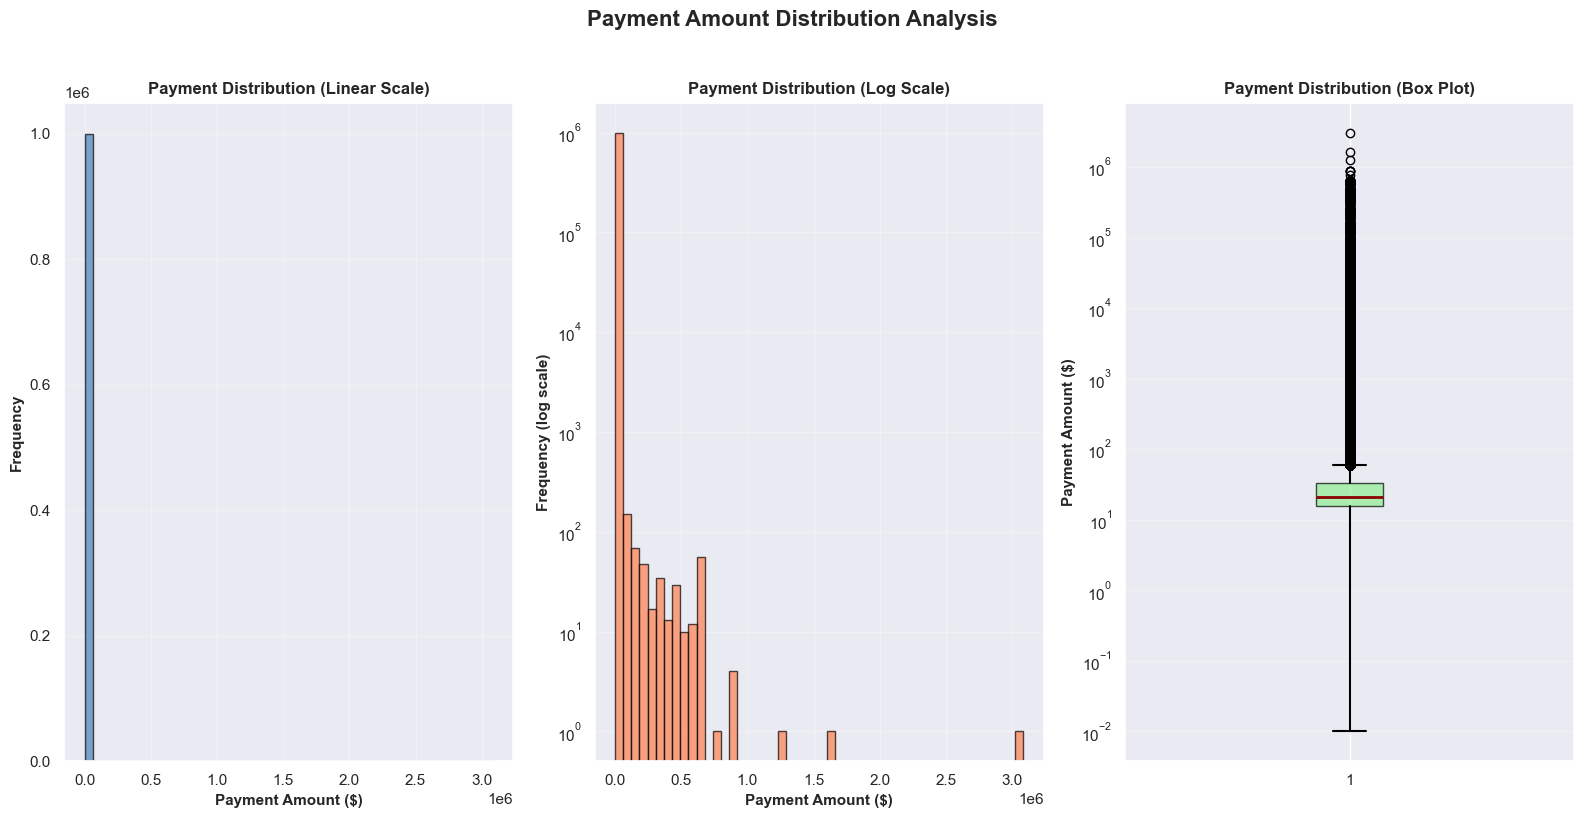

In [11]:
# Visualize payment distribution
fig = visualizer.plot_payment_distribution(df, figsize=CONFIG.viz.large_figsize)
plt.show()

### Categorical Variables Analysis

In [12]:
# Analyze key categorical variables
categorical_vars = [
    'Change_Type',
    'Covered_Recipient_Type',
    'Form_of_Payment_or_Transfer_of_Value',
    'Nature_of_Payment_or_Transfer_of_Value'
]

for var in categorical_vars:
    if var in df.columns:
        print(f"\n{var}")
        summary = loader.get_value_counts_summary(var, top_n=10)
        print(summary.to_string(index=False))


Change_Type
Value  Count  Percentage
  NEW 999988      100.00
  ADD     12        0.00

Covered_Recipient_Type
                                       Value  Count  Percentage
                 Covered Recipient Physician 647029       64.70
Covered Recipient Non-Physician Practitioner 350459       35.05
         Covered Recipient Teaching Hospital   2512        0.25

Form_of_Payment_or_Transfer_of_Value
                                               Value  Count  Percentage
                          In-kind items and services 802371       80.24
                             Cash or cash equivalent 197591       19.76
Stock, stock option, or any other ownership interest     20        0.00
                                        Stock option     16        0.00
      Dividend, profit or other return on investment      2        0.00

Nature_of_Payment_or_Transfer_of_Value
                                                                                                                          

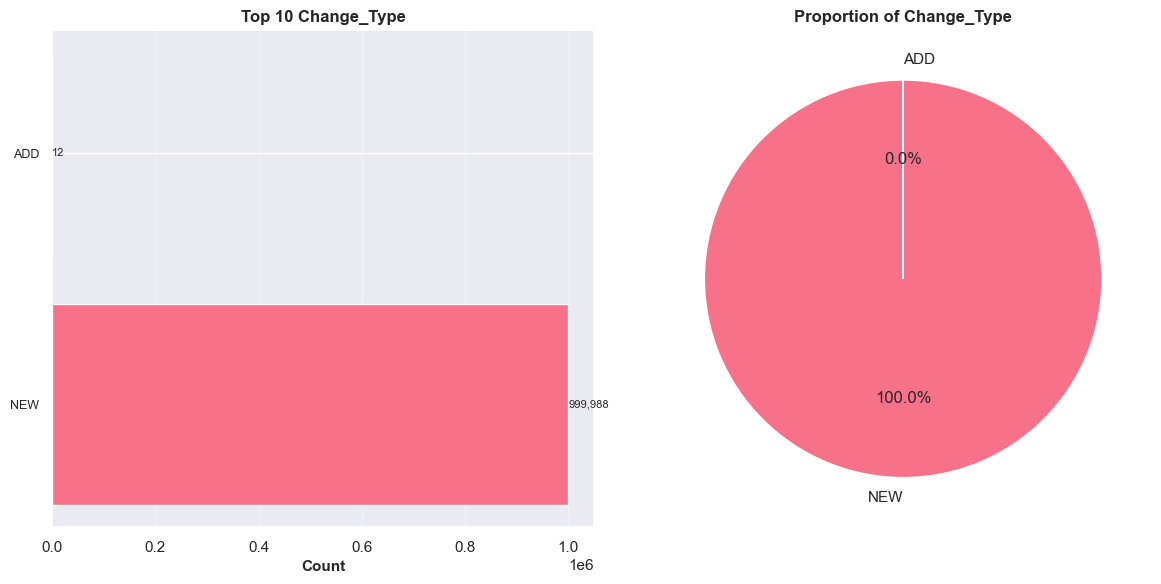

In [13]:
# Visualize Change Type distribution
if 'Change_Type' in df.columns:
    fig = visualizer.plot_category_distribution(df, 'Change_Type', top_n=10, 
                                                figsize=CONFIG.viz.default_figsize)
    plt.show()

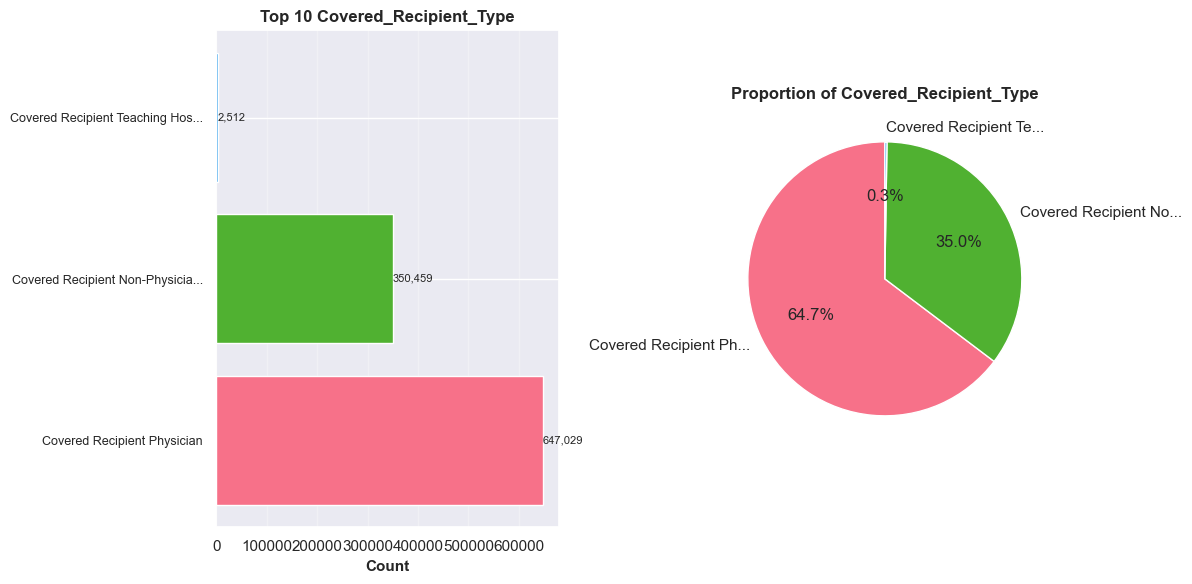

In [14]:
# Visualize Recipient Type distribution
if 'Covered_Recipient_Type' in df.columns:
    fig = visualizer.plot_category_distribution(df, 'Covered_Recipient_Type', top_n=10,
                                                figsize=CONFIG.viz.default_figsize)
    plt.show()

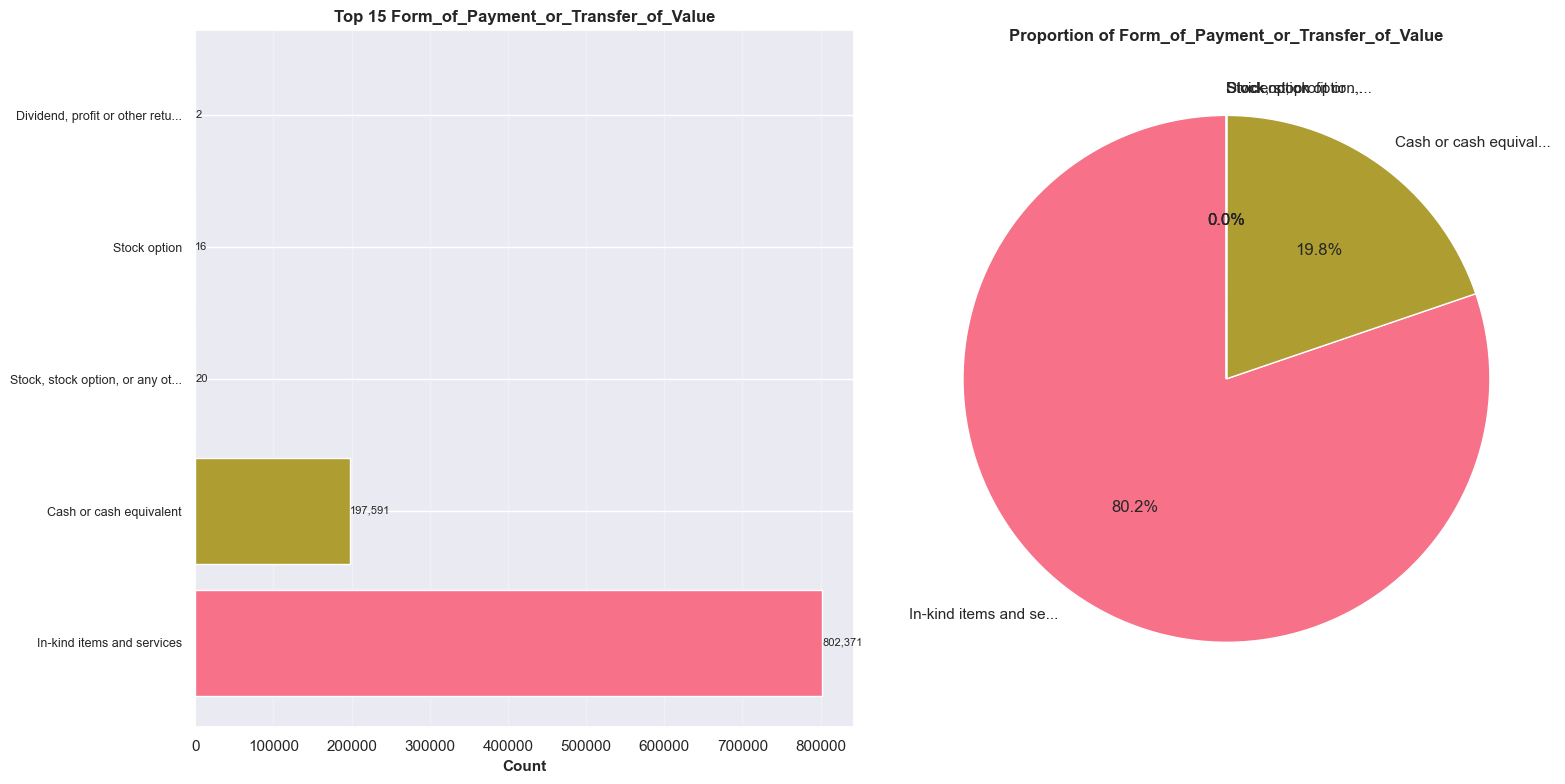

In [15]:
# Visualize Form of Payment distribution
if 'Form_of_Payment_or_Transfer_of_Value' in df.columns:
    fig = visualizer.plot_category_distribution(df, 'Form_of_Payment_or_Transfer_of_Value', 
                                                top_n=15, figsize=CONFIG.viz.large_figsize)
    plt.show()

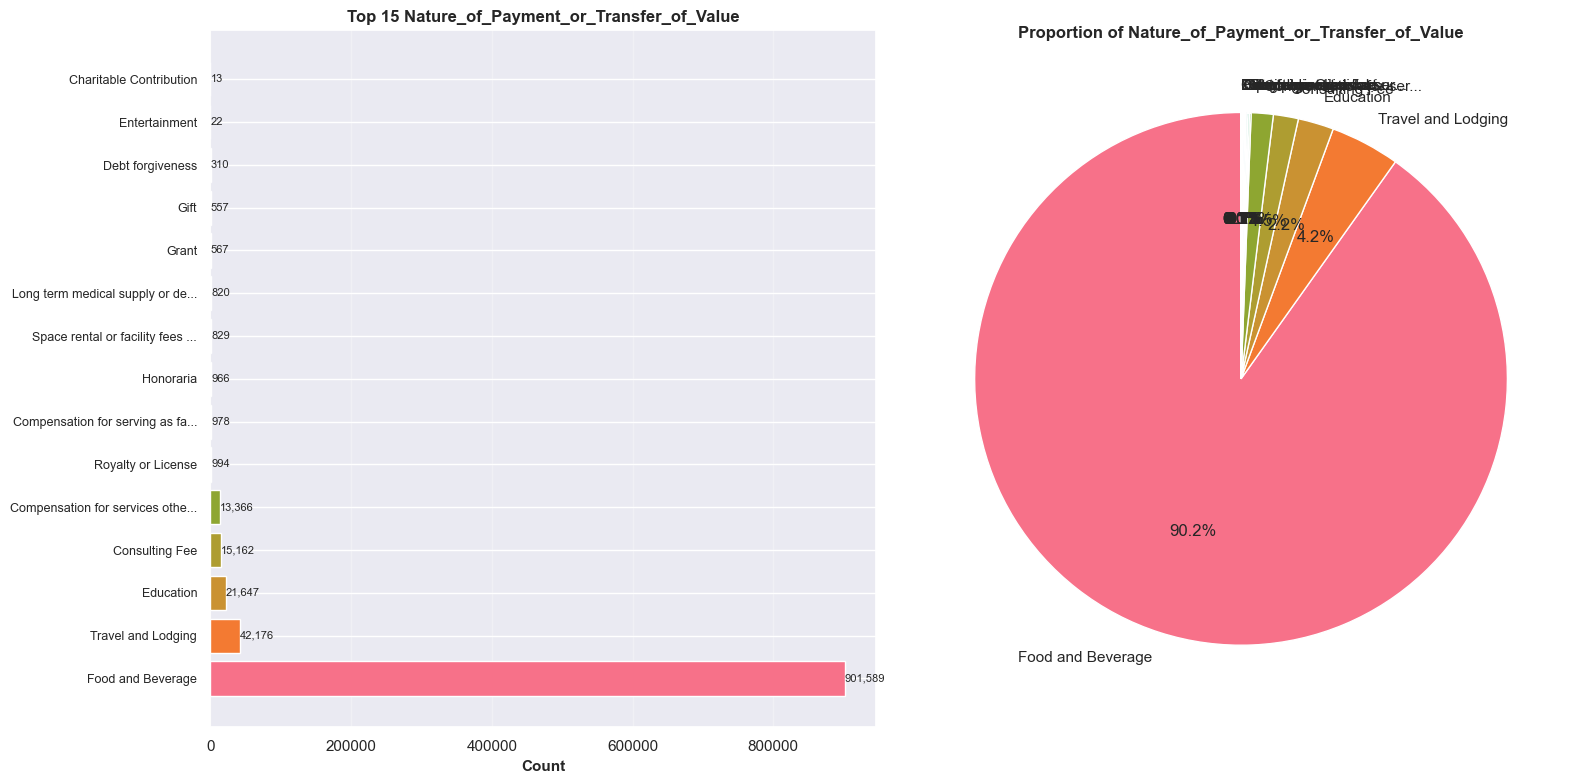

In [16]:
# Visualize Nature of Payment distribution
if 'Nature_of_Payment_or_Transfer_of_Value' in df.columns:
    fig = visualizer.plot_category_distribution(df, 'Nature_of_Payment_or_Transfer_of_Value',
                                                top_n=15, figsize=CONFIG.viz.large_figsize)
    plt.show()

### Specialty Distribution

TOP 20 RECIPIENT SPECIALTIES
                                 Value  Count  Percentage
                        Medical Doctor 540928       54.09
                    Nurse Practitioner 207587       20.76
                   Physician Assistant 128637       12.86
                  Doctor of Osteopathy  61893        6.19
                   Doctor of Optometry  32204        3.22
             Clinical Nurse Specialist  11977        1.20
                   Doctor of Dentistry   6282        0.63
          Doctor of Podiatric Medicine   5500        0.55
Certified Registered Nurse Anesthetist   1304        0.13
               Certified Nurse-Midwife    948        0.09
                          Chiropractor    222        0.02
            Anesthesiologist Assistant      6        0.00


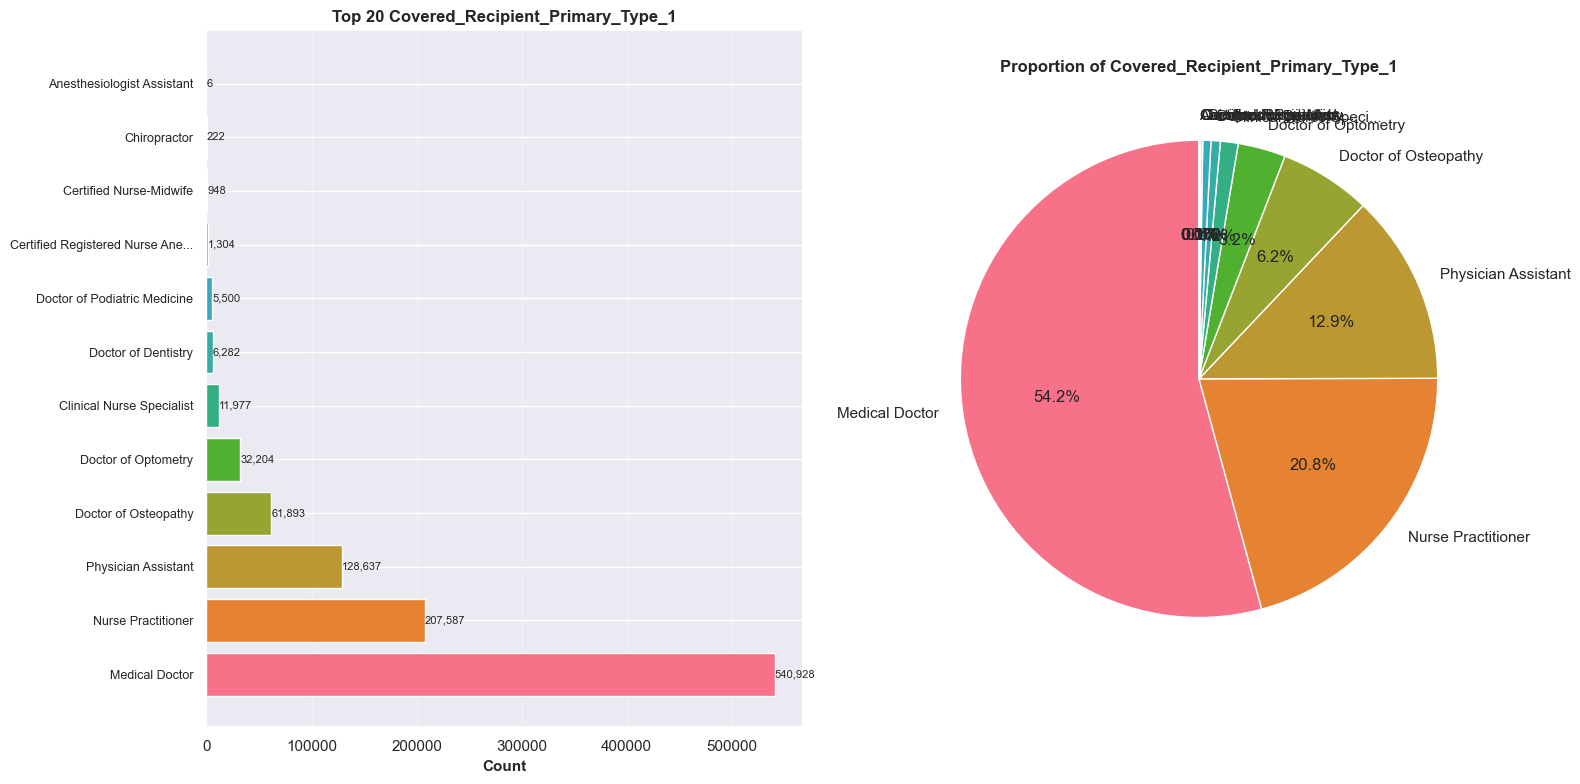

In [17]:
# Analyze primary specialty
if 'Covered_Recipient_Primary_Type_1' in df.columns:
    print("TOP 20 RECIPIENT SPECIALTIES")
    specialty_summary = loader.get_value_counts_summary('Covered_Recipient_Primary_Type_1', top_n=20)
    print(specialty_summary.to_string(index=False))
    
    # Visualize
    fig = visualizer.plot_category_distribution(df, 'Covered_Recipient_Primary_Type_1',
                                                top_n=20, figsize=CONFIG.viz.large_figsize)
    plt.show()

## 5. Bivariate & Multivariate Analysis

Exploring relationships between variables.

### Payment Amount by Category

In [18]:
# Payment amount by recipient type
if 'Covered_Recipient_Type' in df.columns:
    print("PAYMENT STATISTICS BY RECIPIENT TYPE")
    
    type_stats = df.groupby('Covered_Recipient_Type')['Total_Amount_of_Payment_USDollars'].agg([
        'count', 'sum', 'mean', 'median', 'std'
    ]).round(2)
    
    type_stats.columns = ['Count', 'Total ($)', 'Mean ($)', 'Median ($)', 'Std Dev ($)']
    print(type_stats)

PAYMENT STATISTICS BY RECIPIENT TYPE
                                               Count    Total ($)  Mean ($)  \
Covered_Recipient_Type                                                        
Covered Recipient Non-Physician Practitioner  350459  21901587.63     62.49   
Covered Recipient Physician                   647029 176501422.32    272.79   
Covered Recipient Teaching Hospital             2512  86045476.47  34253.77   

                                              Median ($)  Std Dev ($)  
Covered_Recipient_Type                                                 
Covered Recipient Non-Physician Practitioner       19.60      3046.67  
Covered Recipient Physician                        22.00      6485.76  
Covered Recipient Teaching Hospital              2500.00    114396.88  


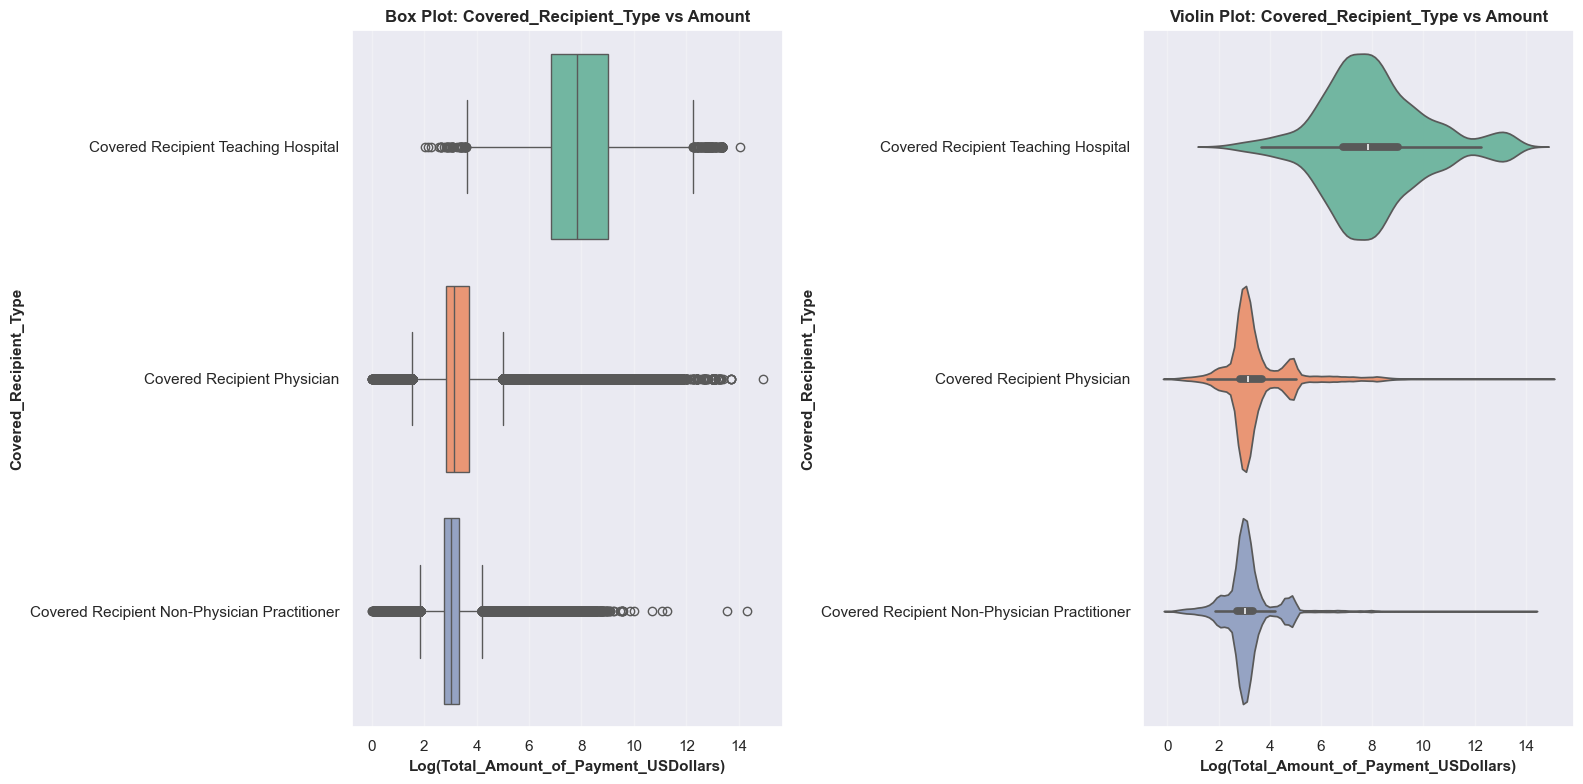

In [19]:
# Visualize payment amount by recipient type
if 'Covered_Recipient_Type' in df.columns:
    fig = visualizer.plot_bivariate_comparison(df, 'Covered_Recipient_Type', 
                                               'Total_Amount_of_Payment_USDollars',
                                               figsize=CONFIG.viz.large_figsize)
    plt.show()

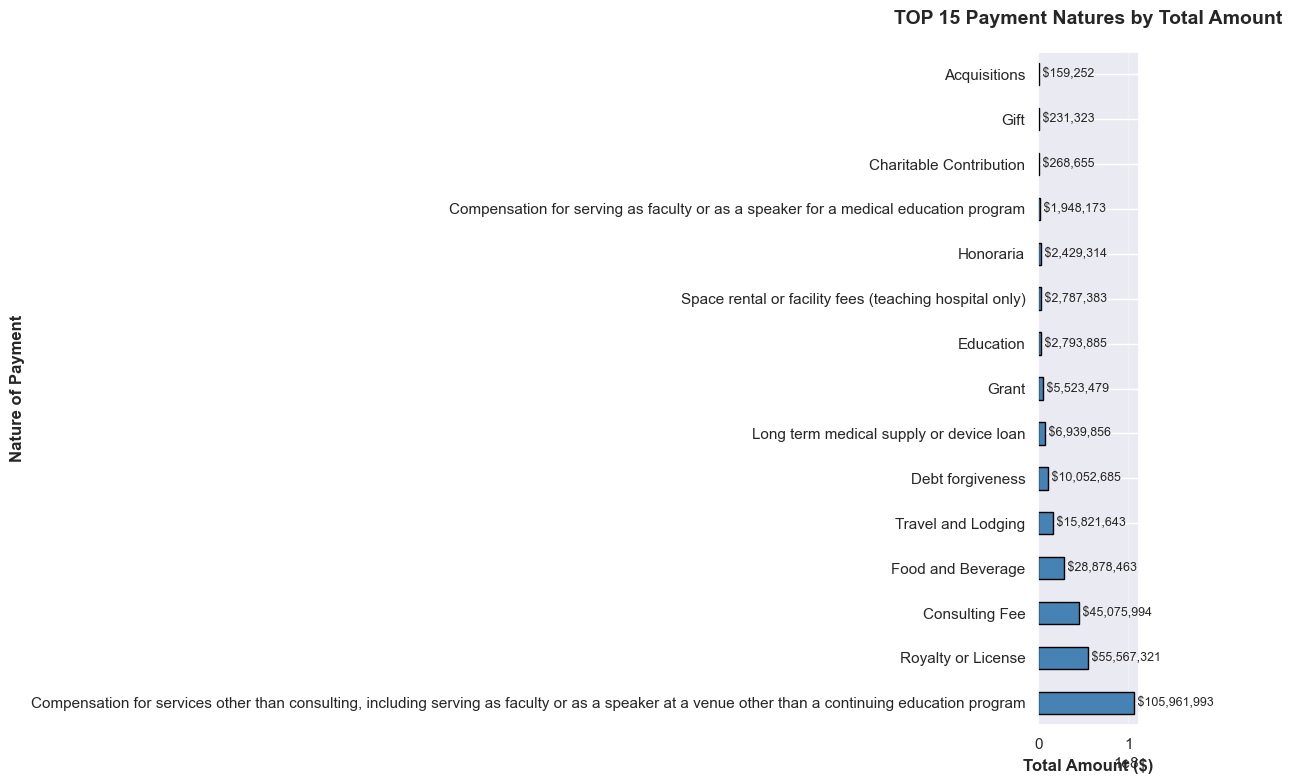

In [20]:
# Payment amount by nature of payment
if 'Nature_of_Payment_or_Transfer_of_Value' in df.columns:
    visualizer.plot_payment_nature_by_total(df, top_n=15)


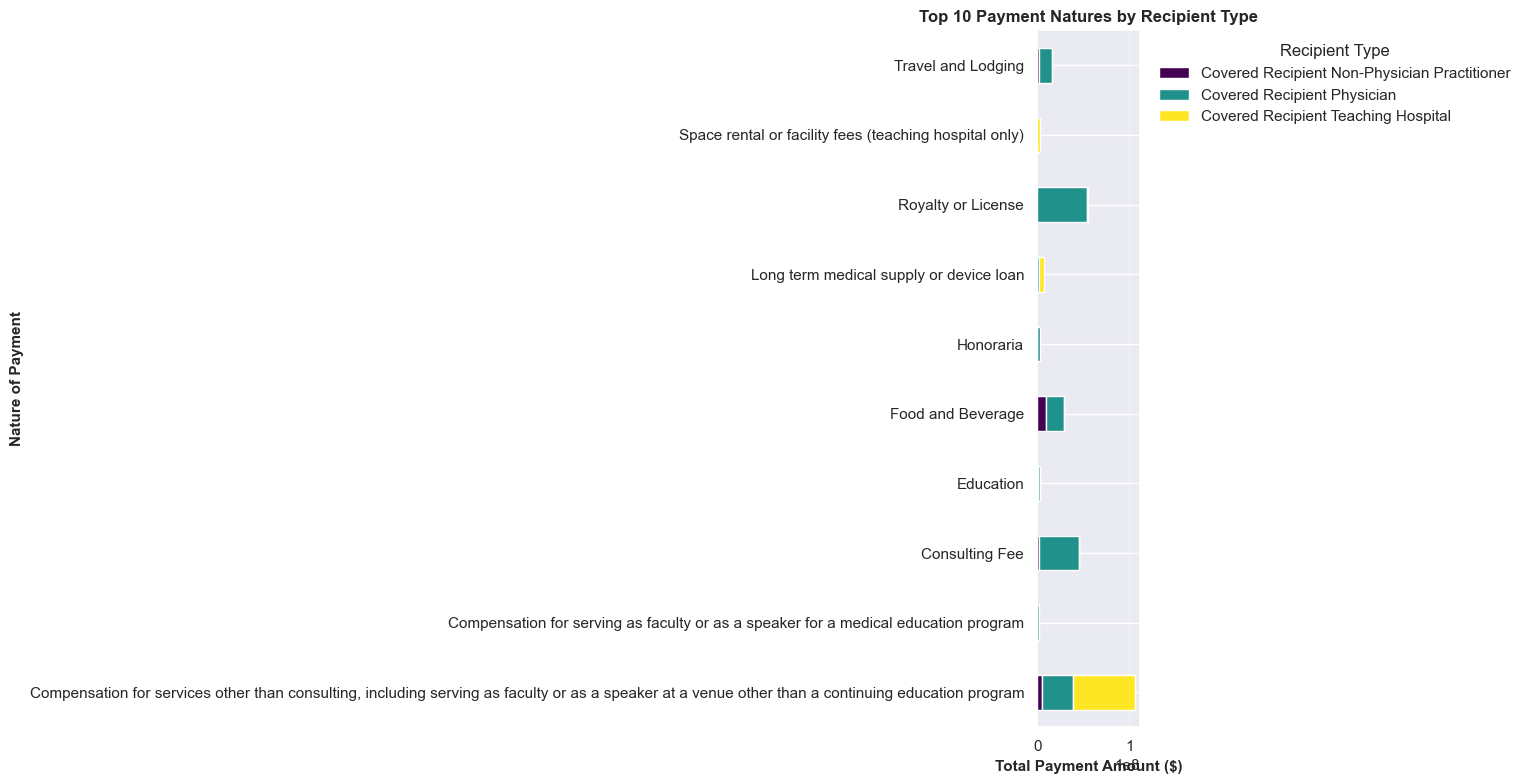

In [21]:
# Visualize payment by nature - stacked bar
if 'Nature_of_Payment_or_Transfer_of_Value' in df.columns:
    top_natures = df['Nature_of_Payment_or_Transfer_of_Value'].value_counts().head(10).index
    df_top = df[df['Nature_of_Payment_or_Transfer_of_Value'].isin(top_natures)].copy()
    
    fig, ax = plt.subplots(figsize=CONFIG.viz.large_figsize)
    
    # Calculate statistics
    nature_by_type = df_top.groupby(['Nature_of_Payment_or_Transfer_of_Value', 
                                     'Covered_Recipient_Type'])['Total_Amount_of_Payment_USDollars'].sum().unstack(fill_value=0)
    
    nature_by_type.plot(kind='barh', stacked=True, ax=ax, colormap='viridis')
    ax.set_xlabel('Total Payment Amount ($)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Nature of Payment', fontsize=11, fontweight='bold')
    ax.set_title('Top 10 Payment Natures by Recipient Type', fontsize=12, fontweight='bold')
    ax.legend(title='Recipient Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### Correlation Analysis

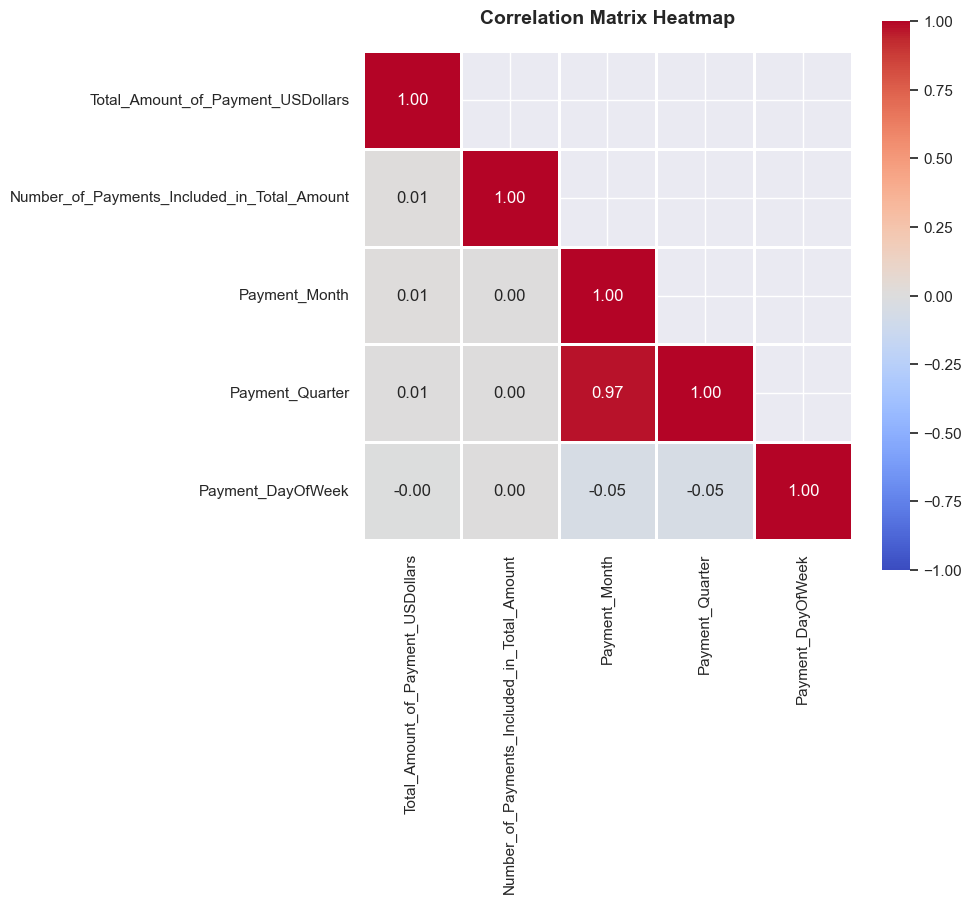

In [22]:
# Select numeric columns for correlation
numeric_features = [
    'Total_Amount_of_Payment_USDollars',
    'Number_of_Payments_Included_in_Total_Amount',
    'Payment_Month',
    'Payment_Quarter',
    'Payment_DayOfWeek'
]

# Filter to existing columns
numeric_features = [col for col in numeric_features if col in df.columns]

if len(numeric_features) > 2:
    fig = visualizer.plot_correlation_heatmap(df, numeric_features, 
                                              figsize=CONFIG.viz.square_figsize)
    plt.show()

## 6. Temporal Analysis

Analyzing payment patterns over time.

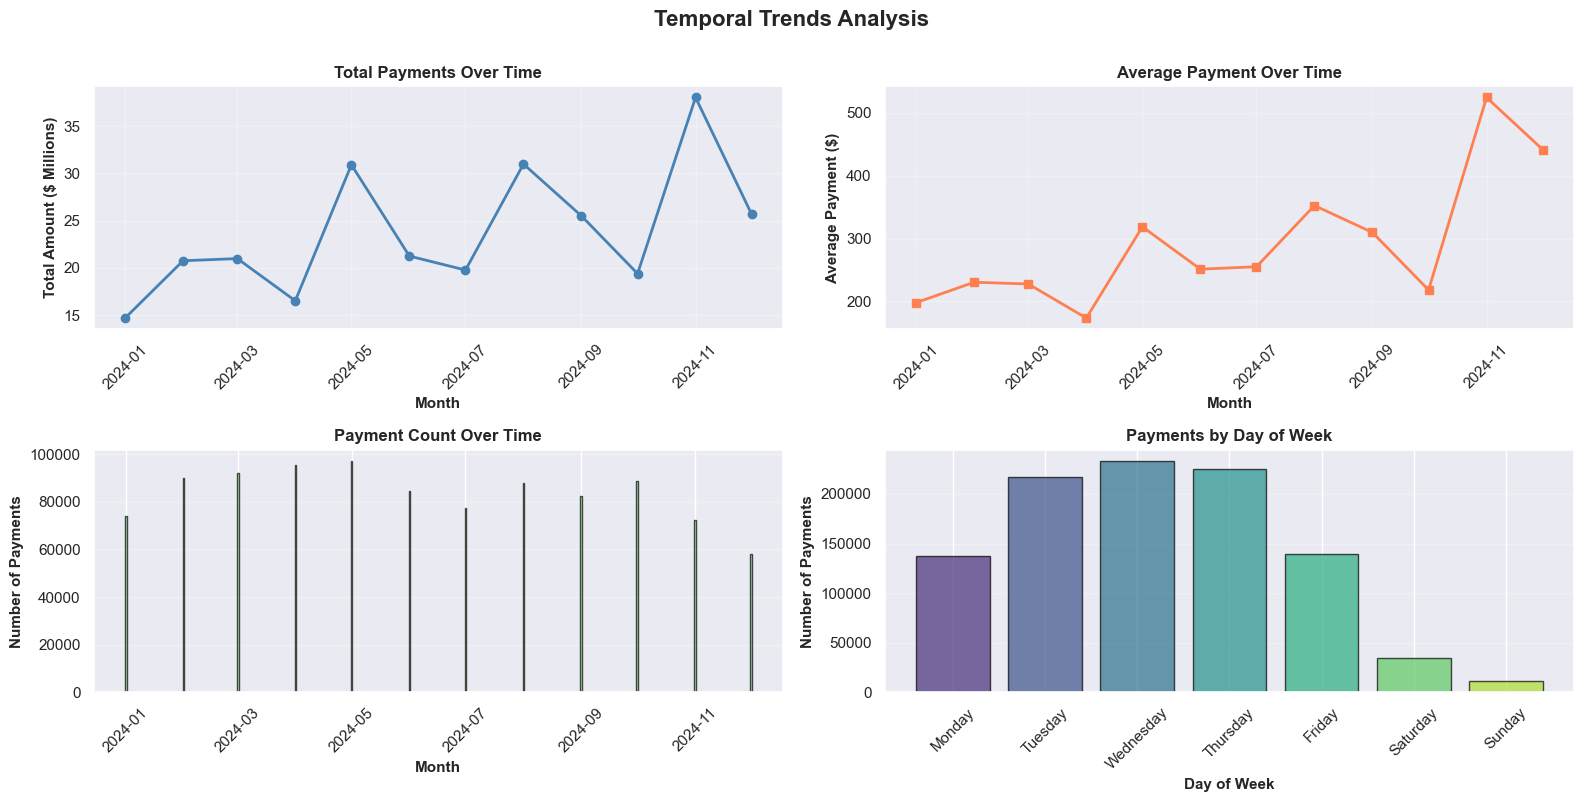

In [23]:
# Temporal trends
if 'Date_of_Payment' in df.columns:
    fig = visualizer.plot_temporal_trends(df, figsize=CONFIG.viz.large_figsize)
    plt.show()

In [24]:
# Payment seasonality analysis
if 'Payment_Month' in df.columns:
    print("MONTHLY PAYMENT STATISTICS")
    
    monthly_stats = df.groupby('Payment_Month')['Total_Amount_of_Payment_USDollars'].agg([
        'count', 'sum', 'mean', 'median'
    ]).round(2)
    
    monthly_stats.columns = ['Count', 'Total ($)', 'Mean ($)', 'Median ($)']
    monthly_stats.index.name = 'Month'
    print(monthly_stats)

MONTHLY PAYMENT STATISTICS
       Count   Total ($)  Mean ($)  Median ($)
Month                                         
1      74180 14698104.63    198.14       20.21
2      90012 20756568.81    230.60       20.82
3      92107 20987287.73    227.86       21.57
4      95182 16525575.24    173.62       21.24
5      96926 30899708.57    318.80       21.09
6      84547 21252548.08    251.37       21.06
7      77447 19773076.06    255.31       20.39
8      87861 30980088.18    352.60       20.55
9      82290 25492338.95    309.79       21.40
10     88858 19393658.65    218.25       21.23
11     72479 38019066.93    524.55       21.80
12     58111 25670464.59    441.75       21.38



QUARTERLY PAYMENT STATISTICS
          Count   Total ($)  Mean ($)  Median ($)
Quarter                                          
1        256299 56441961.17    220.22       20.87
2        276655 68677831.89    248.24       21.13
3        247598 76245503.19    307.94       20.75
4        219448 83083190.17    378.60       21.45


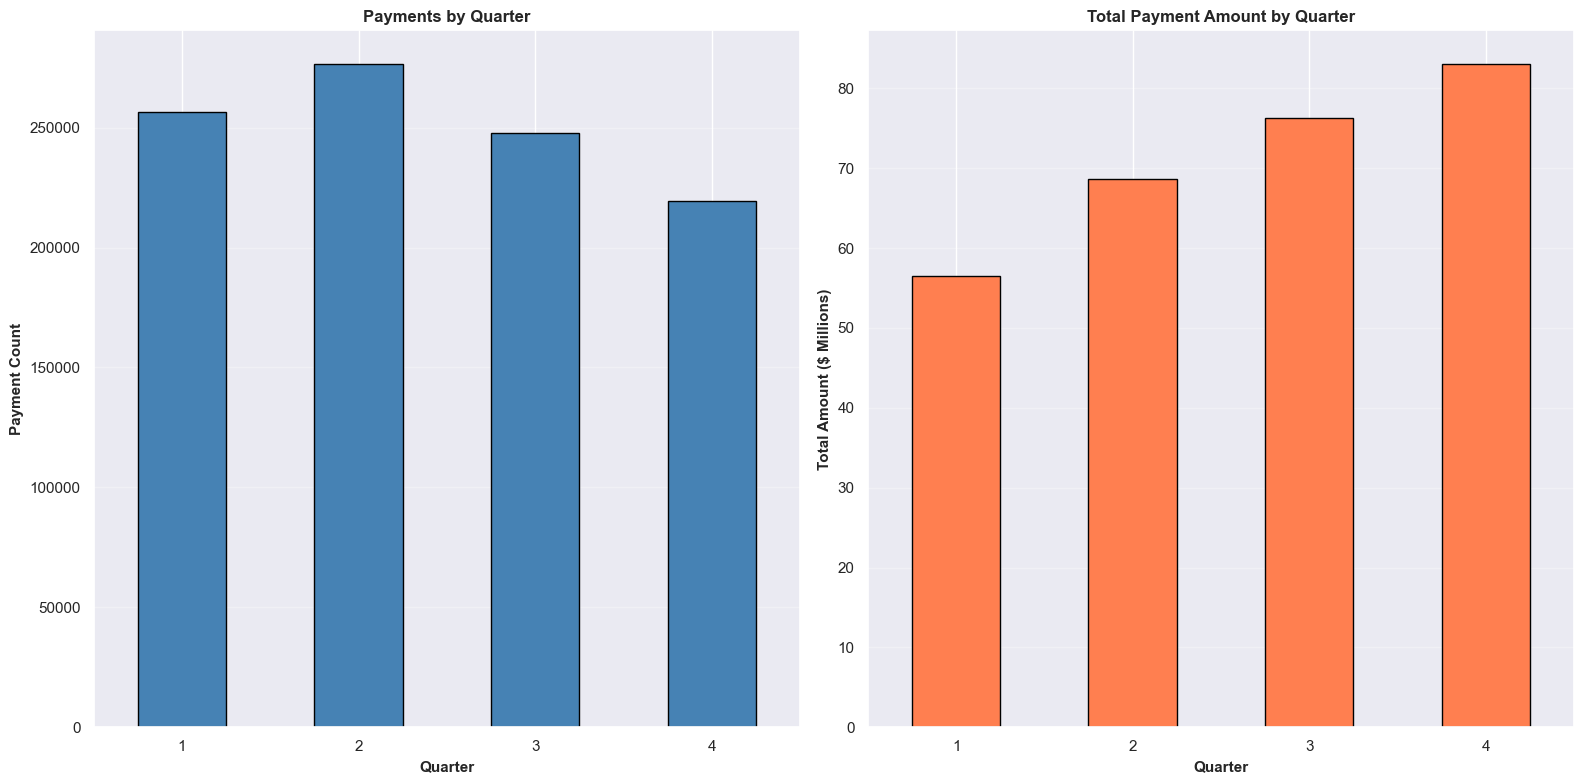

In [25]:
# Quarterly analysis
if 'Payment_Quarter' in df.columns:
    print("\nQUARTERLY PAYMENT STATISTICS")
    
    quarterly_stats = df.groupby('Payment_Quarter')['Total_Amount_of_Payment_USDollars'].agg([
        'count', 'sum', 'mean', 'median'
    ]).round(2)
    
    quarterly_stats.columns = ['Count', 'Total ($)', 'Mean ($)', 'Median ($)']
    quarterly_stats.index.name = 'Quarter'
    print(quarterly_stats)
    
    fig = visualizer.plot_quarterly_trends(df, figsize=CONFIG.viz.large_figsize)
    plt.show()

## 7. Geographic Analysis

Analyzing payment distributions across geographic regions.

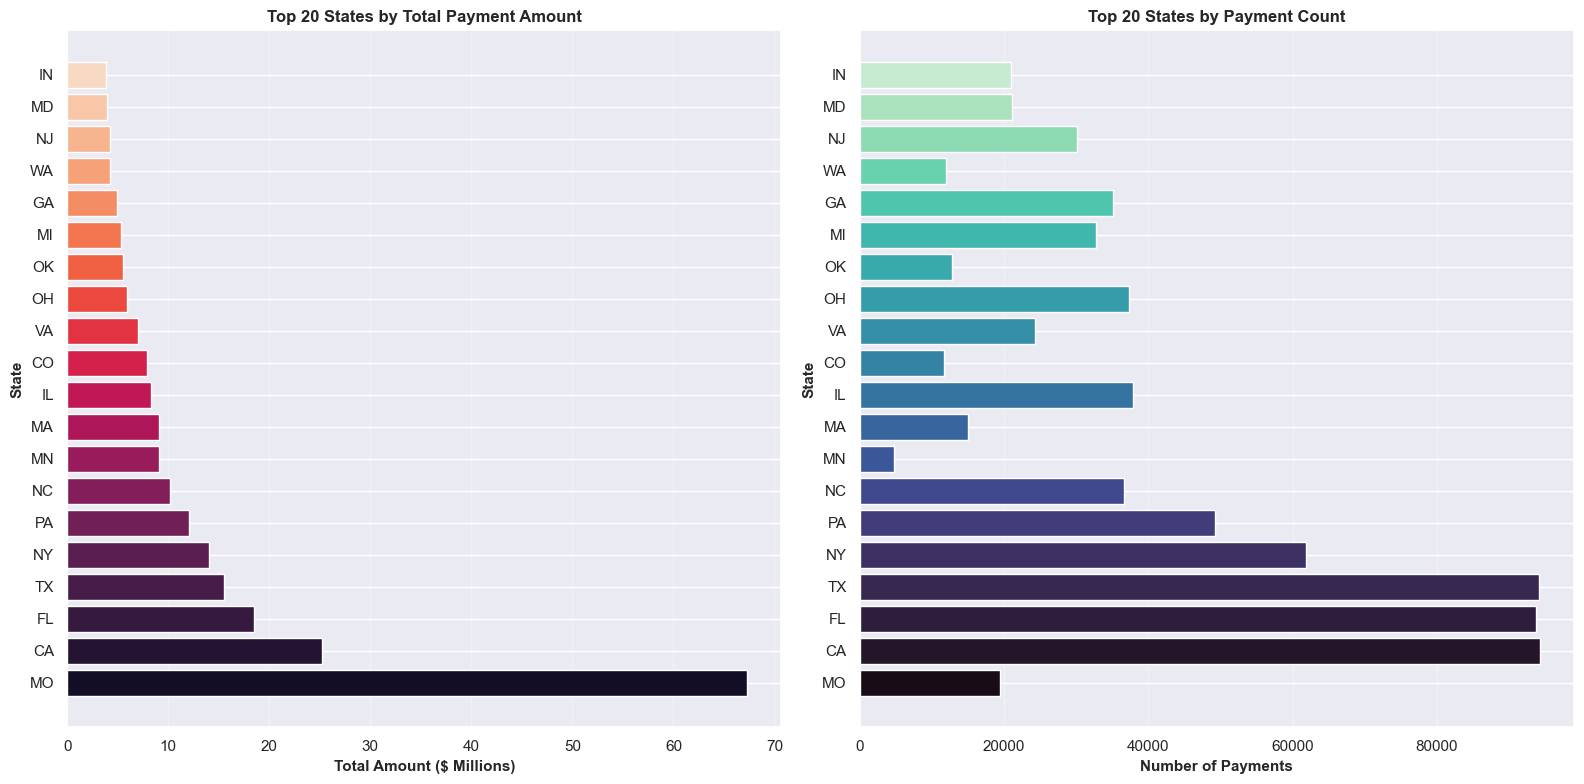

In [26]:
# Geographic distribution
if 'Recipient_State' in df.columns:
    fig = visualizer.plot_geographic_distribution(df, figsize=CONFIG.viz.large_figsize)
    plt.show()

In [27]:
# State-level statistics
if 'Recipient_State' in df.columns:
    print("TOP 20 STATES BY PAYMENT METRICS")
    
    state_stats = df.groupby('Recipient_State')['Total_Amount_of_Payment_USDollars'].agg([
        'count', 'sum', 'mean', 'median'
    ]).round(2)
    
    state_stats.columns = ['Count', 'Total ($)', 'Mean ($)', 'Median ($)']
    state_stats = state_stats.sort_values('Total ($)', ascending=False).head(20)
    state_stats.index.name = 'State'
    print(state_stats)

TOP 20 STATES BY PAYMENT METRICS
       Count   Total ($)  Mean ($)  Median ($)
State                                         
MO     19482 67327300.66   3455.87       20.64
CA     94277 25167907.27    266.96       24.09
FL     93700 18505824.50    197.50       21.76
TX     94164 15526355.75    164.89       20.88
NY     61855 14009083.83    226.48       23.34
PA     49200 12003048.63    243.96       20.48
NC     36592 10196695.83    278.66       20.01
MN      4750  9125128.78   1921.08       41.03
MA     14980  9116650.66    608.59       26.79
IL     37826  8307782.59    219.63       22.20
CO     11704  7896783.46    674.71       23.69
VA     24222  7030867.58    290.27       21.97
OH     37374  5893064.41    157.68       19.50
OK     12774  5471582.55    428.34       18.88
MI     32722  5339480.06    163.18       20.00
GA     35161  4908618.48    139.60       20.68
WA     11945  4202107.77    351.79       24.20
NJ     30086  4186520.17    139.15       17.48
MD     21131  3908388.03   

In [28]:
# Interactive choropleth map
if 'Recipient_State' in df.columns:
    fig = visualizer.create_choropleth_map(df, title='Total Payment Amount by State')
    fig.show()

In [29]:
# Enhanced geographic visualization with scatter map
if 'Recipient_State' in df.columns:
    fig = visualizer.create_scatter_geo_map(df, title='Payment Distribution Across US States')
    fig.show()

## 8. Feature Engineering

Creating aggregated features for anomaly detection and risk scoring.

In [30]:
# Initialize feature engineer
feature_engineer = FeatureEngineer()

# Determine grouping columns
group_cols = ['Covered_Recipient_Profile_ID', 'Covered_Recipient_Type']

# Add specialty and state if available
if 'Covered_Recipient_Primary_Type_1' in df.columns:
    group_cols.append('Covered_Recipient_Primary_Type_1')
if 'Recipient_State' in df.columns:
    group_cols.append('Recipient_State')

print(f"Grouping by: {', '.join(group_cols)}")

Grouping by: Covered_Recipient_Profile_ID, Covered_Recipient_Type, Covered_Recipient_Primary_Type_1, Recipient_State


In [31]:
# Create aggregated features
df_aggregated = feature_engineer.create_aggregated_features(df, group_cols)

print(f"Shape: {df_aggregated.shape}")
print(f"Columns: {', '.join(df_aggregated.columns.tolist()[:15])}...")

Creating aggregated features grouped by: Covered_Recipient_Profile_ID, Covered_Recipient_Type, Covered_Recipient_Primary_Type_1, Recipient_State
Created 266,979 aggregated records with 15 features
Shape: (266979, 15)
Columns: Covered_Recipient_Profile_ID, Covered_Recipient_Type, Covered_Recipient_Primary_Type_1, Recipient_State, Total_Amount_of_Payment_USDollars_sum, Total_Amount_of_Payment_USDollars_mean, Total_Amount_of_Payment_USDollars_median, Total_Amount_of_Payment_USDollars_std, Total_Amount_of_Payment_USDollars_min, Total_Amount_of_Payment_USDollars_max, Total_Amount_of_Payment_USDollars_count, Number_of_Payments_Included_in_Total_Amount_sum, Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID_nunique, Form_of_Payment_or_Transfer_of_Value_<lambda>, Nature_of_Payment_or_Transfer_of_Value_<lambda>...


In [32]:
# Display sample aggregated data
df_aggregated.head()

,Covered_Recipient_Profile_ID,Covered_Recipient_Type,Covered_Recipient_Primary_Type_1,Recipient_State,Total_Amount_of_Payment_USDollars_sum,Total_Amount_of_Payment_USDollars_mean,Total_Amount_of_Payment_USDollars_median,Total_Amount_of_Payment_USDollars_std,Total_Amount_of_Payment_USDollars_min,Total_Amount_of_Payment_USDollars_max,Total_Amount_of_Payment_USDollars_count,Number_of_Payments_Included_in_Total_Amount_sum,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID_nunique,Form_of_Payment_or_Transfer_of_Value_<lambda>,Nature_of_Payment_or_Transfer_of_Value_<lambda>
0,13.00,Covered Recipient Physician,Medical Doctor,FL,18.67,18.67,18.67,NaN,18.67,18.67,1,1,1,1,1
1,18.00,Covered Recipient Physician,Medical Doctor,AZ,319.68,45.67,20.28,42.99,16.29,131.27,7,7,4,2,1
2,19.00,Covered Recipient Physician,Medical Doctor,GA,19.98,19.98,19.98,NaN,19.98,19.98,1,1,1,1,1
3,20.00,Covered Recipient Physician,Medical Doctor,MD,34.80,34.80,34.80,NaN,34.80,34.80,1,1,1,1,1
4,21.00,Covered Recipient Physician,Medical Doctor,CO,80.49,20.12,20.75,1.91,17.34,21.66,4,4,1,1,1


In [33]:
# Create derived features
df_aggregated = feature_engineer.create_derived_features(df_aggregated)

derived_cols = [col for col in df_aggregated.columns if col.startswith(('log_', 'amount_cv', 'payment_'))]
print(f"Created {len(derived_cols)} derived features")

Created 5 derived features
Created 5 derived features


In [34]:
# Summary statistics of aggregated features
df_aggregated.describe().T

,count,mean,std,min,25%,50%,75%,max
Covered_Recipient_Profile_ID,266928.00,5356971.71,5020349.34,13.00,332321.50,2790780.50,10912524.50,11695650.00
Total_Amount_of_Payment_USDollars_sum,266979.00,1065.43,125918.50,0.32,23.42,54.58,141.15,64109057.93
Total_Amount_of_Payment_USDollars_mean,266979.00,137.13,7322.76,0.17,18.01,22.98,41.62,3082225.00
Total_Amount_of_Payment_USDollars_median,266979.00,115.81,7243.07,0.17,17.44,21.80,33.40,3082225.00
Total_Amount_of_Payment_USDollars_std,143512.00,133.11,2404.75,0.00,2.93,7.05,33.97,288583.07
Total_Amount_of_Payment_USDollars_min,266979.00,89.49,7135.42,0.01,14.39,18.37,25.52,3082225.00
Total_Amount_of_Payment_USDollars_max,266979.00,301.12,9476.90,0.23,19.75,26.52,89.00,3082225.00
Total_Amount_of_Payment_USDollars_count,266979.00,3.75,6.62,1.00,1.00,2.00,4.00,321.00
Number_of_Payments_Included_in_Total_Amount_sum,266979.00,3.76,6.76,1.00,1.00,2.00,4.00,491.00
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID_nunique,266979.00,1.28,0.63,1.00,1.00,1.00,1.00,29.00


## 9. Outlier Detection

Identifying statistical outliers in payment data using multiple methods.


In [35]:
# Outlier detection using multiple statistical methods
print("OUTLIER DETECTION ANALYSIS")

# Focus on payment amounts
amounts = df_aggregated['Total_Amount_of_Payment_USDollars_sum'].dropna()

# Method 1: IQR (Interquartile Range)
Q1 = amounts.quantile(0.25)
Q3 = amounts.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df_aggregated[
    (df_aggregated['Total_Amount_of_Payment_USDollars_sum'] < lower_bound) |
    (df_aggregated['Total_Amount_of_Payment_USDollars_sum'] > upper_bound)
]

print(f"\nIQR Method:")
print(f"  Lower Bound: ${lower_bound:,.2f}")
print(f"  Upper Bound: ${upper_bound:,.2f}")
print(f"  Outliers Detected: {len(iqr_outliers):,} ({len(iqr_outliers)/len(df_aggregated)*100:.2f}%)")

# Method 2: Z-Score
z_scores = np.abs(stats.zscore(amounts))
z_threshold = 3
z_outliers = df_aggregated[np.abs(stats.zscore(df_aggregated['Total_Amount_of_Payment_USDollars_sum'].fillna(0))) > z_threshold]

print(f"\nZ-Score Method (threshold={z_threshold}):")
print(f"  Outliers Detected: {len(z_outliers):,} ({len(z_outliers)/len(df_aggregated)*100:.2f}%)")

# Method 3: Percentile-based
percentile_99 = amounts.quantile(0.99)
percentile_outliers = df_aggregated[df_aggregated['Total_Amount_of_Payment_USDollars_sum'] > percentile_99]

print(f"\nPercentile Method (99th percentile):")
print(f"  Threshold: ${percentile_99:,.2f}")
print(f"  Outliers Detected: {len(percentile_outliers):,} ({len(percentile_outliers)/len(df_aggregated)*100:.2f}%)")

# Store outlier flags
df_aggregated['is_outlier_iqr'] = (
    (df_aggregated['Total_Amount_of_Payment_USDollars_sum'] < lower_bound) |
    (df_aggregated['Total_Amount_of_Payment_USDollars_sum'] > upper_bound)
)
df_aggregated['is_outlier_zscore'] = np.abs(
    stats.zscore(df_aggregated['Total_Amount_of_Payment_USDollars_sum'].fillna(0))
) > z_threshold
df_aggregated['is_outlier_percentile'] = df_aggregated['Total_Amount_of_Payment_USDollars_sum'] > percentile_99

OUTLIER DETECTION ANALYSIS

IQR Method:
  Lower Bound: $-153.18
  Upper Bound: $317.75
  Outliers Detected: 26,048 (9.76%)

Z-Score Method (threshold=3):
  Outliers Detected: 63 (0.02%)

Percentile Method (99th percentile):
  Threshold: $10,269.57
  Outliers Detected: 2,670 (1.00%)


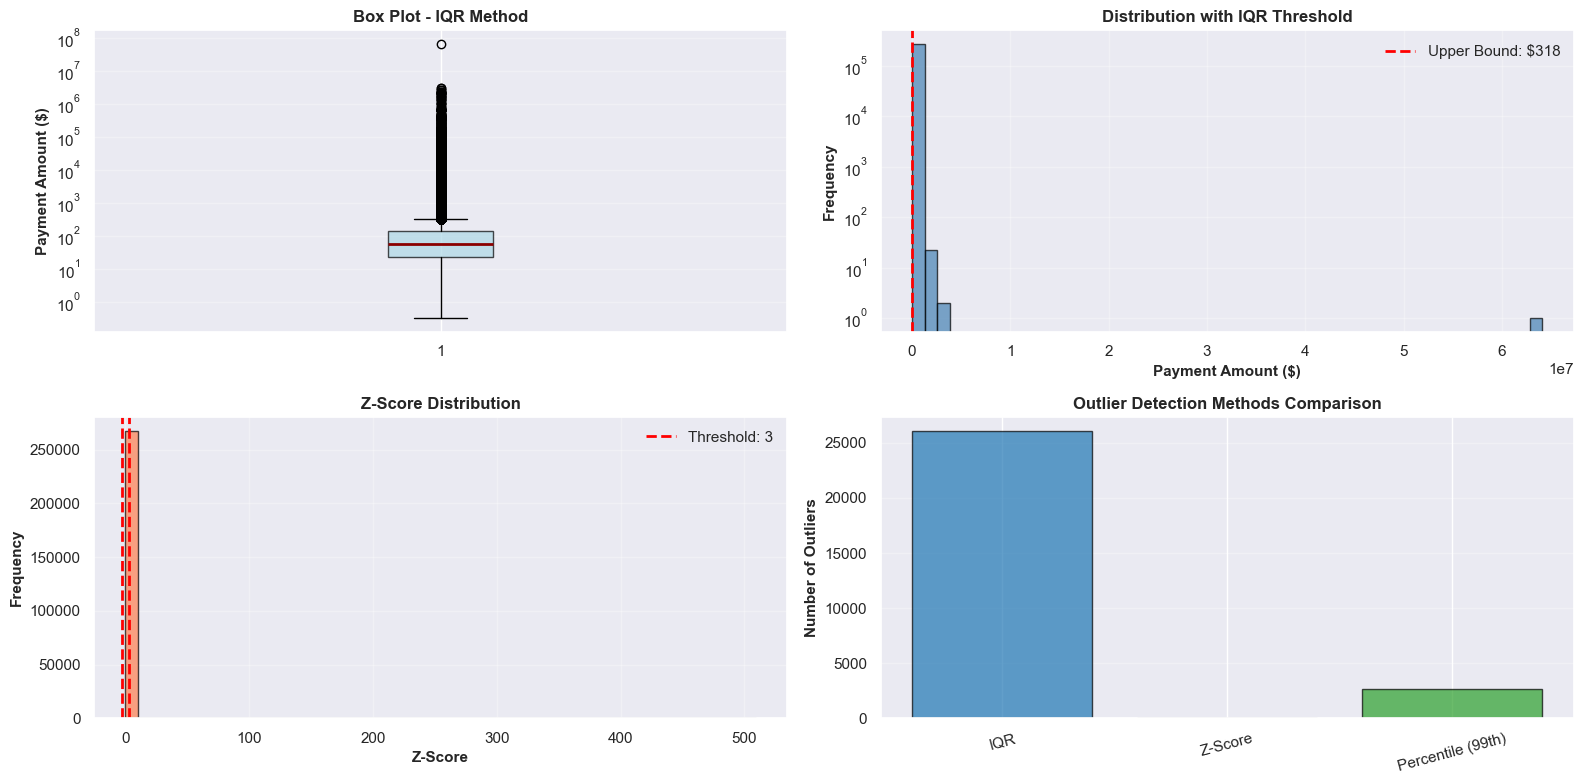

In [36]:
# Visualize outliers
fig = visualizer.plot_outliers_analysis(df_aggregated, amounts, lower_bound, upper_bound, z_threshold=3, 
                                        figsize=CONFIG.viz.large_figsize)
plt.show()

In [37]:
# Analyze outlier characteristics
print("\nOUTLIER CHARACTERISTICS (IQR Method)")

outliers = df_aggregated[df_aggregated['is_outlier_iqr']].copy()

if len(outliers) > 0:
    # Summary statistics
    print(f"\nPayment Amount Statistics for Outliers:")
    print(f"  Count: {len(outliers):,}")
    print(f"  Mean: ${outliers['Total_Amount_of_Payment_USDollars_sum'].mean():,.2f}")
    print(f"  Median: ${outliers['Total_Amount_of_Payment_USDollars_sum'].median():,.2f}")
    print(f"  Min: ${outliers['Total_Amount_of_Payment_USDollars_sum'].min():,.2f}")
    print(f"  Max: ${outliers['Total_Amount_of_Payment_USDollars_sum'].max():,.2f}")
    
    # Recipient type distribution
    if 'Covered_Recipient_Type' in outliers.columns:
        print(f"\nOutliers by Recipient Type:")
        type_dist = outliers['Covered_Recipient_Type'].value_counts()
        for rtype, count in type_dist.items():
            pct = (count / len(outliers)) * 100
            print(f"  {rtype}: {count} ({pct:.1f}%)")
    
    # Top specialties
    if 'Covered_Recipient_Primary_Type_1' in outliers.columns:
        print(f"\nTop 10 Specialties Among Outliers:")
        specialty_dist = outliers['Covered_Recipient_Primary_Type_1'].value_counts().head(10)
        for spec, count in specialty_dist.items():
            print(f"  {spec}: {count}")


OUTLIER CHARACTERISTICS (IQR Method)

Payment Amount Statistics for Outliers:
  Count: 26,048
  Mean: $10,221.36
  Median: $666.39
  Min: $317.78
  Max: $64,109,057.93

Outliers by Recipient Type:
  Covered Recipient Physician: 19467 (74.7%)
  Covered Recipient Non-Physician Practitioner: 6530 (25.1%)
  Covered Recipient Teaching Hospital: 51 (0.2%)

Top 10 Specialties Among Outliers:
  Medical Doctor: 16429
  Nurse Practitioner: 3552
  Physician Assistant: 2892
  Doctor of Osteopathy: 1487
  Doctor of Optometry: 743
  Doctor of Dentistry: 526
  Doctor of Podiatric Medicine: 277
  Clinical Nurse Specialist: 76
  Certified Registered Nurse Anesthetist: 6
  Chiropractor: 5


In [38]:
# Top outliers analysis
print(f"\nTOP {CONFIG.analysis.top_n_entities} OUTLIERS BY PAYMENT AMOUNT")

top_outliers = outliers.nlargest(CONFIG.analysis.top_n_entities, 'Total_Amount_of_Payment_USDollars_sum')

display_cols = [col for col in [
    'Covered_Recipient_Type',
    'Covered_Recipient_Primary_Type_1',
    'Recipient_State',
    'Total_Amount_of_Payment_USDollars_sum',
    'Total_Amount_of_Payment_USDollars_count',
    'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID_nunique'
] if col in top_outliers.columns]

top_outliers[display_cols]


TOP 20 OUTLIERS BY PAYMENT AMOUNT


,Covered_Recipient_Type,Covered_Recipient_Primary_Type_1,Recipient_State,Total_Amount_of_Payment_USDollars_sum,Total_Amount_of_Payment_USDollars_count,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID_nunique
266951,Covered Recipient Teaching Hospital,NaN,MO,64109057.93,231,15
110664,Covered Recipient Physician,Doctor of Podiatric Medicine,OK,3082225.00,1,1
266946,Covered Recipient Teaching Hospital,NaN,MA,2994796.24,103,21
266932,Covered Recipient Teaching Hospital,NaN,CA,2537395.12,321,29
66653,Covered Recipient Physician,Medical Doctor,CA,2525376.54,22,3
38686,Covered Recipient Physician,Medical Doctor,MN,2269726.09,33,2
10561,Covered Recipient Physician,Medical Doctor,NC,2224466.07,27,2
114758,Covered Recipient Physician,Medical Doctor,IA,2213662.69,12,2
78421,Covered Recipient Physician,Medical Doctor,CO,2175966.30,57,2
53479,Covered Recipient Physician,Medical Doctor,SD,2167309.41,4,1


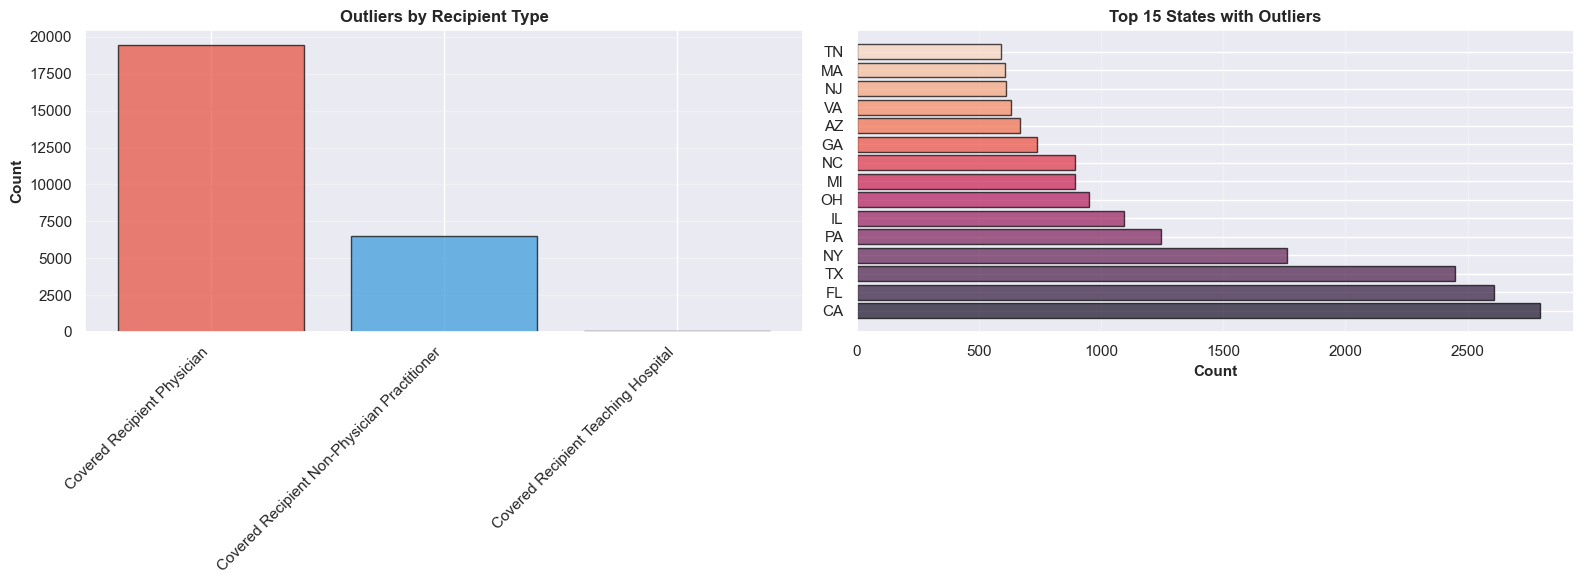

In [39]:
# Outlier patterns visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Outliers by recipient type
if 'Covered_Recipient_Type' in outliers.columns and len(outliers) > 0:
    type_counts = outliers['Covered_Recipient_Type'].value_counts()
    axes[0].bar(range(len(type_counts)), type_counts.values, 
               color=['#e74c3c', '#3498db', '#2ecc71'][:len(type_counts)], 
               edgecolor='black', alpha=0.7)
    axes[0].set_xticks(range(len(type_counts)))
    axes[0].set_xticklabels(type_counts.index, rotation=45, ha='right')
    axes[0].set_ylabel('Count', fontsize=11, fontweight='bold')
    axes[0].set_title('Outliers by Recipient Type', fontsize=12, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)

# Outliers by state (top 15)
if 'Recipient_State' in outliers.columns and len(outliers) > 0:
    state_counts = outliers['Recipient_State'].value_counts().head(15)
    axes[1].barh(range(len(state_counts)), state_counts.values, 
                color=sns.color_palette('rocket', len(state_counts)), 
                edgecolor='black', alpha=0.7)
    axes[1].set_yticks(range(len(state_counts)))
    axes[1].set_yticklabels(state_counts.index)
    axes[1].set_xlabel('Count', fontsize=11, fontweight='bold')
    axes[1].set_title('Top 15 States with Outliers', fontsize=12, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Advanced Visualizations


### 3D Scatter Plot: Amount, Frequency, Diversity

In [40]:
# 3D Scatter Plot: Payment Amount vs Frequency vs Manufacturer Diversity
if all(col in df_aggregated.columns for col in ['Total_Amount_of_Payment_USDollars_sum', 
                                                   'Total_Amount_of_Payment_USDollars_count',
                                                   'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID_nunique']):
    
    color_col = 'Covered_Recipient_Type' if 'Covered_Recipient_Type' in df_aggregated.columns else None
    
    fig = adv_visualizer.create_3d_scatter(
        df_aggregated,
        x_col='Total_Amount_of_Payment_USDollars_count',
        y_col='Total_Amount_of_Payment_USDollars_sum',
        z_col='Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID_nunique',
        color_col=color_col,
        size_col='Total_Amount_of_Payment_USDollars_sum',
        title='3D Payment Analysis: Amount vs Frequency vs Manufacturer Diversity',
        sample_size=1000,
        log_y=True
    )
    
    fig.show()

### Parallel Coordinates Plot

In [41]:
# Parallel Coordinates Plot for Payment Patterns
selected_features = [
    'Total_Amount_of_Payment_USDollars_sum',
    'Total_Amount_of_Payment_USDollars_count',
    'Total_Amount_of_Payment_USDollars_mean',
    'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID_nunique'
]

numeric_cols = [col for col in df_aggregated.columns if df_aggregated[col].dtype in ['int64', 'float64']]
selected_features = [col for col in selected_features if col in numeric_cols]

if len(selected_features) >= 3:
    color_col = 'Covered_Recipient_Type' if 'Covered_Recipient_Type' in df_aggregated.columns else None
    
    fig = adv_visualizer.create_parallel_coordinates(
        df_aggregated,
        feature_cols=selected_features,
        color_col=color_col,
        title='Parallel Coordinates: Multi-dimensional Payment Patterns',
        sample_size=500
    )
    
    fig.show()

### Sunburst Chart: Hierarchical Payment Breakdown

In [42]:
# Create sunburst chart for payment hierarchy
if all(col in df.columns for col in ['Covered_Recipient_Type', 'Nature_of_Payment_or_Transfer_of_Value']):
    # Prepare data for sunburst
    df_sunburst = df.groupby(['Covered_Recipient_Type', 
                              'Nature_of_Payment_or_Transfer_of_Value'])['Total_Amount_of_Payment_USDollars'].sum().reset_index()
    
    # Take top categories to avoid overcrowding
    top_natures = df['Nature_of_Payment_or_Transfer_of_Value'].value_counts().head(10).index
    df_sunburst = df_sunburst[df_sunburst['Nature_of_Payment_or_Transfer_of_Value'].isin(top_natures)]
    
    fig = adv_visualizer.create_sunburst_chart(
        df_sunburst,
        path_cols=['Covered_Recipient_Type', 'Nature_of_Payment_or_Transfer_of_Value'],
        value_col='Total_Amount_of_Payment_USDollars',
        title='Payment Hierarchy: Recipient Type → Nature of Payment'
    )
    
    fig.show()

In [43]:
# Animated bubble chart showing payment trends over time
if all(col in df.columns for col in ['Payment_Month', 'Covered_Recipient_Type']):
    
    # Aggregate by month and recipient type
    df_animated = df.groupby(['Payment_Month', 'Covered_Recipient_Type']).agg({
        'Total_Amount_of_Payment_USDollars': ['sum', 'mean', 'count']
    }).reset_index()
    
    df_animated.columns = ['Month', 'Recipient_Type', 'Total_Amount', 'Avg_Amount', 'Payment_Count']
    
    fig = adv_visualizer.create_animated_bubble(
        df_animated,
        x_col='Payment_Count',
        y_col='Total_Amount',
        size_col='Avg_Amount',
        color_col='Recipient_Type',
        animation_col='Month',
        title='Payment Trends Over Time by Recipient Type'
    )
    
    fig.show()

In [44]:
# Create correlation network visualization
numeric_cols = df_aggregated.select_dtypes(include=[np.number]).columns.tolist()

# Select key features for correlation network
key_features = [col for col in [
    'Total_Amount_of_Payment_USDollars_sum',
    'Total_Amount_of_Payment_USDollars_count',
    'Total_Amount_of_Payment_USDollars_mean',
    'Total_Amount_of_Payment_USDollars_median',
    'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID_nunique',
    'Physician_Profile_ID_nunique',
    'Number_of_Payments_Included_in_Total_nunique'
] if col in numeric_cols]

if len(key_features) >= 4:
    # Create correlation heatmap
    fig = adv_visualizer.create_correlation_heatmap(
        df_aggregated,
        feature_cols=key_features,
        title='Feature Correlation Matrix: Payment Metrics',
        annotate=True
    )
    
    fig.show()
    
    # Get and print strong correlations
    strong_corr = adv_visualizer.get_strong_correlations(
        df_aggregated,
        feature_cols=key_features,
        threshold=0.7
    )
    
    if strong_corr:
        print("\nStrong Correlations (|r| > 0.7):")
        for feat1, feat2, corr_val in strong_corr:
            print(f"  {feat1[:40]} <-> {feat2[:40]}: {corr_val:.3f}")


Strong Correlations (|r| > 0.7):
  Total_Amount_of_Payment_USDollars_mean <-> Total_Amount_of_Payment_USDollars_median: 0.995


### Correlation Network: Payment Feature Relationships


### Animated Bubble Chart: Payment Evolution Over Time


In [45]:
# Radar chart comparing payment metrics across recipient types
if 'Covered_Recipient_Type' in df_aggregated.columns:
    
    # Calculate metrics for radar chart
    metrics = ['Total_Amount_of_Payment_USDollars_sum', 
               'Total_Amount_of_Payment_USDollars_count',
               'Total_Amount_of_Payment_USDollars_mean',
               'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID_nunique']
    
    metrics = [m for m in metrics if m in df_aggregated.columns]
    
    if len(metrics) >= 3:
        fig = adv_visualizer.create_radar_chart(
            df_aggregated,
            group_col='Covered_Recipient_Type',
            metric_cols=metrics,
            title='Payment Metrics Comparison by Recipient Type (Normalized)',
            normalize=True
        )
        
        fig.show()

### Radar Chart: Payment Metrics Comparison


In [46]:
# Create treemap for hierarchical payment breakdown
if all(col in df.columns for col in ['Nature_of_Payment_or_Transfer_of_Value', 
                                      'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name']):
    
    # Aggregate by nature and manufacturer (top categories only)
    top_natures = df['Nature_of_Payment_or_Transfer_of_Value'].value_counts().head(8).index
    df_tree = df[df['Nature_of_Payment_or_Transfer_of_Value'].isin(top_natures)].copy()
    
    # Get aggregated data
    df_tree_agg = df_tree.groupby([
        'Nature_of_Payment_or_Transfer_of_Value',
        'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'
    ])['Total_Amount_of_Payment_USDollars'].sum().reset_index()
    
    fig = adv_visualizer.create_treemap(
        df_tree_agg,
        path_cols=['Nature_of_Payment_or_Transfer_of_Value', 
                   'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'],
        value_col='Total_Amount_of_Payment_USDollars',
        title='Payment Treemap: Nature of Payment to Manufacturer',
        threshold_percentile=0.90
    )
    
    fig.show()

### Treemap: Payment Distribution by Nature and Manufacturer


In [47]:
# Interactive violin plot for payment distributions
if 'Covered_Recipient_Type' in df.columns:
    fig = adv_visualizer.create_violin_plot(
        df,
        x_col='Covered_Recipient_Type',
        y_col='Total_Amount_of_Payment_USDollars',
        title='Payment Amount Distribution by Recipient Type',
        sample_size=5000,
        log_y=True
    )
    
    fig.show()